In [1]:
# Constants
TRAIN_FRACTION = 0.7
RANDOM_SEED = 86720

In [2]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib
import re
from matplotlib import pyplot as plt

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
df = pd.read_csv(r"..\..\data\diabetes\diabetes.csv")

In [4]:
train_df = df.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)
train_x_df = train_df.iloc[:,:8].values
train_y_df = train_df.iloc[:,8].values

test_df = df.drop(index=train_df.index)
test_x_df = test_df.iloc[:,:8].values
test_y_df = test_df.iloc[:,8].values

In [5]:

max_depth=20
criterion='entropy'
class_weight=None
records=[]
for depth in range(1,max_depth+1):

    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=depth,class_weight=class_weight,splitter='random')

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,train_x_df, train_y_df, test_x_df, test_y_df, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED,num_rounds=200)

    print('Average expected loss: %.3f' % avg_expected_loss)
    print('Average bias: %.3f' % avg_bias)
    print('Average variance: %.3f' % avg_var)
    records.append([depth,avg_expected_loss,avg_bias,avg_var])

dbv=pd.DataFrame.from_records(records,columns=['Depth','Loss','BIAS','VARIANCE'])
dbv.to_csv('DepthBiasVariance.csv',index=False)
    

Average expected loss: 0.295
Average bias: 0.287
Average variance: 0.068
Average expected loss: 0.248
Average bias: 0.191
Average variance: 0.154
Average expected loss: 0.241
Average bias: 0.204
Average variance: 0.152
Average expected loss: 0.233
Average bias: 0.178
Average variance: 0.147
Average expected loss: 0.243
Average bias: 0.165
Average variance: 0.164
Average expected loss: 0.244
Average bias: 0.165
Average variance: 0.170
Average expected loss: 0.253
Average bias: 0.152
Average variance: 0.184
Average expected loss: 0.264
Average bias: 0.161
Average variance: 0.196
Average expected loss: 0.269
Average bias: 0.165
Average variance: 0.203
Average expected loss: 0.276
Average bias: 0.170
Average variance: 0.212
Average expected loss: 0.282
Average bias: 0.178
Average variance: 0.222
Average expected loss: 0.287
Average bias: 0.187
Average variance: 0.227
Average expected loss: 0.290
Average bias: 0.178
Average variance: 0.230
Average expected loss: 0.296
Average bias: 0.187
Av

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


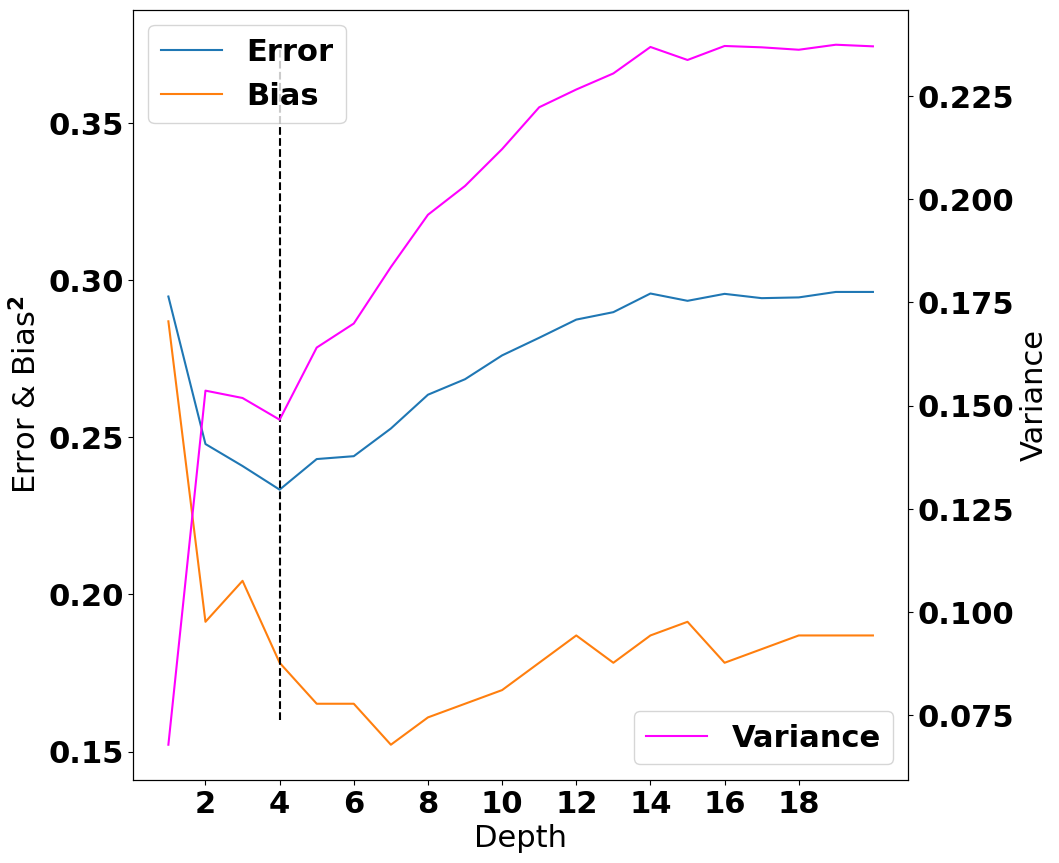

In [6]:
max_depth=20
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Depth') 
ax1.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,1])
ax1.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,2])
ax1.set_xticks(range(2,20,2))

ax2=ax1.twinx()
ax2.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.vlines(x=4,ymin=0.160,ymax=0.375,colors='k',linestyles='dashed')
ax1.legend(['Error','Bias'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')
plt.show()

Accuracy - 76.52173913043478
Recall - 63.63636363636363
Precision - 58.333333333333336
FPR - 18.292682926829272


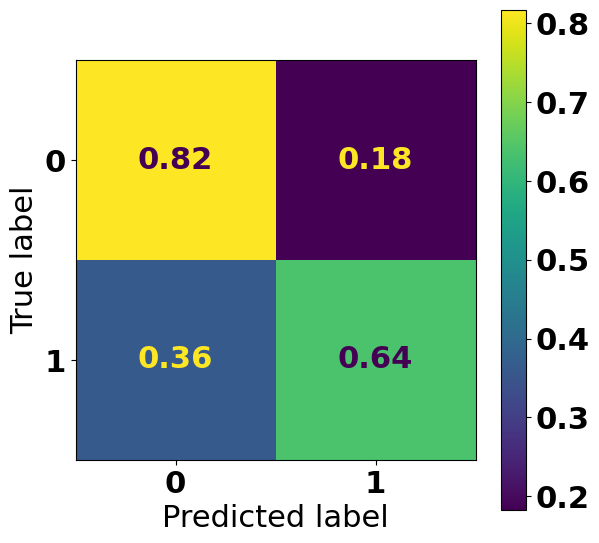

In [7]:
dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=4,class_weight=class_weight)
dtree.fit(train_x_df,train_y_df)
pred_test_y=dtree.predict(test_x_df)
proba_test_y = dtree.predict_proba(test_x_df)

Accuracy= 100*metrics.accuracy_score(test_y_df,pred_test_y)
Recall=100*metrics.recall_score(test_y_df,pred_test_y)
Precision= 100*metrics.precision_score(test_y_df,pred_test_y)
FPR = 100*(1-metrics.recall_score(test_y_df,pred_test_y,pos_label=0))
print(f"Accuracy - {Accuracy}")
print(f"Recall - {Recall}")
print(f"Precision - {Precision}")
print(f"FPR - {FPR}")
fig=plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])
metrics.ConfusionMatrixDisplay.from_predictions(test_y_df,pred_test_y,normalize='true',ax=ax)

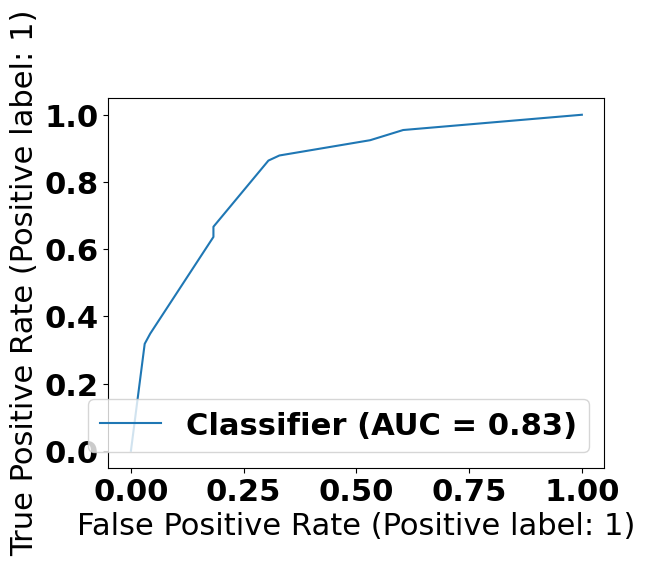

In [8]:

rocDisplay = metrics.RocCurveDisplay.from_predictions(test_y_df,proba_test_y[:,1])

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


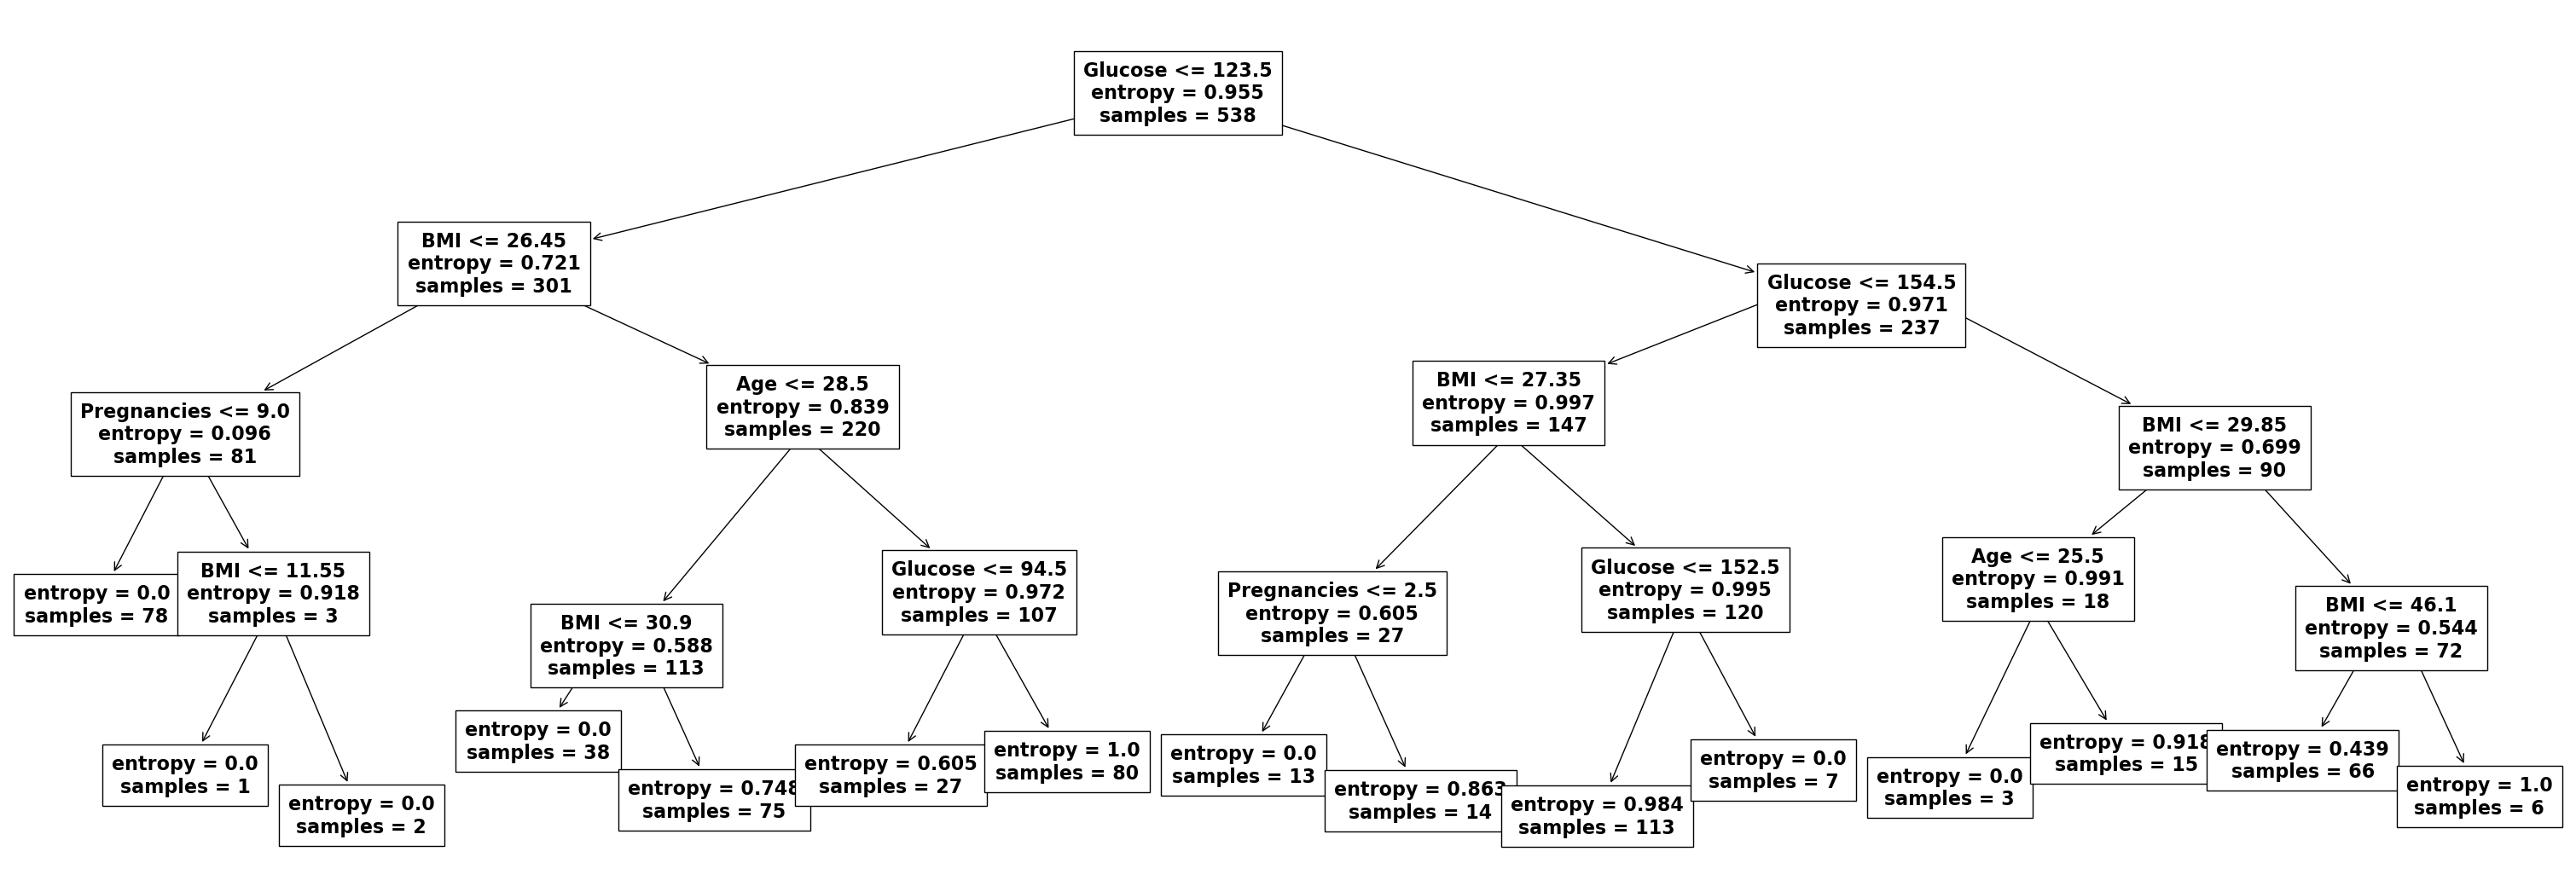

In [9]:
fig=plt.figure(figsize=[30,10])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(dtree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    tx.set_text(tx.get_text().replace('x[1]',train_df.columns[1]))
    tx.set_text(tx.get_text().replace('x[5]',train_df.columns[5]))
    tx.set_text(tx.get_text().replace('x[7]',train_df.columns[7]))
    tx.set_text(tx.get_text().replace('x[0]',train_df.columns[0]))
    tx.set_text(re.sub('\nvalue .*','',tx.get_text()))
    cur_y=tx._y
    if(cur_y in ycollect):
        tx.set_y(cur_y+sign*np.random.rand()*0.05)
        sign=sign*-1
        ycollect.append(tx._y)
    else:
        ycollect.append(cur_y)
    tx.set_fontsize(16)
plt.savefig('optimal_tree_depth_4.svg',format='svg')
plt.show()

In [16]:

max_depth=20
criterion='entropy'
class_weight='balanced'
records=[]
for depth in range(1,max_depth+1):

    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=depth,class_weight=class_weight,splitter='random')

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,train_x_df, train_y_df, test_x_df, test_y_df, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED,num_rounds=200)

    print('Average expected loss: %.3f' % avg_expected_loss)
    print('Average bias: %.3f' % avg_bias)
    print('Average variance: %.3f' % avg_var)
    records.append([depth,avg_expected_loss,avg_bias,avg_var])

dbv=pd.DataFrame.from_records(records,columns=['Depth','Loss','BIAS','VARIANCE'])
dbv.to_csv('DepthBiasVariance_balanced.csv',index=False)

Average expected loss: 0.287
Average bias: 0.257
Average variance: 0.139
Average expected loss: 0.274
Average bias: 0.217
Average variance: 0.147
Average expected loss: 0.296
Average bias: 0.257
Average variance: 0.156
Average expected loss: 0.273
Average bias: 0.217
Average variance: 0.161
Average expected loss: 0.278
Average bias: 0.217
Average variance: 0.169
Average expected loss: 0.281
Average bias: 0.200
Average variance: 0.187
Average expected loss: 0.281
Average bias: 0.191
Average variance: 0.197
Average expected loss: 0.285
Average bias: 0.209
Average variance: 0.208
Average expected loss: 0.284
Average bias: 0.187
Average variance: 0.209
Average expected loss: 0.284
Average bias: 0.191
Average variance: 0.213
Average expected loss: 0.281
Average bias: 0.191
Average variance: 0.213
Average expected loss: 0.281
Average bias: 0.178
Average variance: 0.213
Average expected loss: 0.279
Average bias: 0.170
Average variance: 0.212
Average expected loss: 0.279
Average bias: 0.170
Av

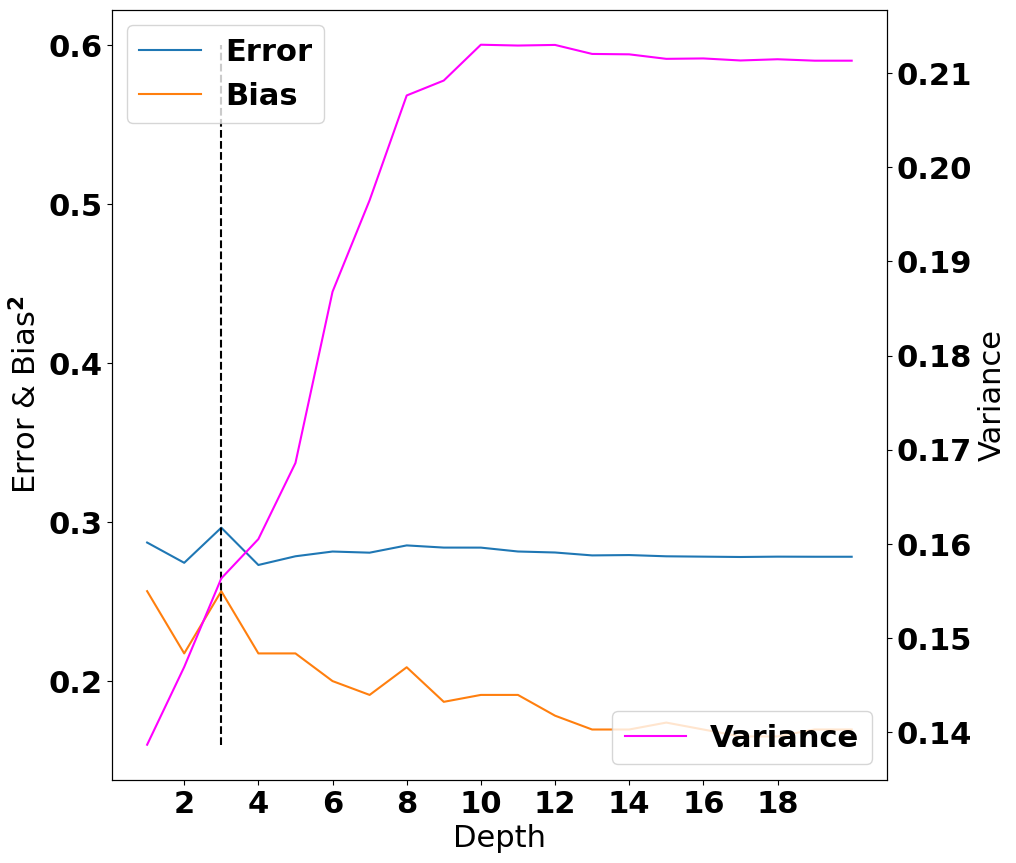

In [17]:
max_depth=20
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Depth') 
ax1.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,1])
ax1.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,2])
ax1.set_xticks(range(2,20,2))

ax2=ax1.twinx()
ax2.plot(dbv.iloc[:max_depth,0],dbv.iloc[:max_depth,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.vlines(x=3,ymin=0.160,ymax=0.6,colors='k',linestyles='dashed')
ax1.legend(['Error','Bias'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')
plt.show()

Accuracy - 70.43478260869566
Recall - 90.9090909090909
Precision - 49.18032786885246
FPR - 37.80487804878049


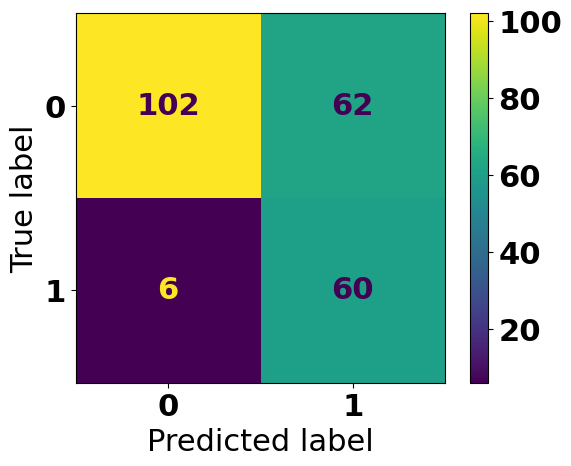

In [18]:
dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=3,class_weight=class_weight)
dtree.fit(train_x_df,train_y_df)
pred_test_y=dtree.predict(test_x_df)
proba_test_y = dtree.predict_proba(test_x_df)


Accuracy= 100*metrics.accuracy_score(test_y_df,pred_test_y)
Recall=100*metrics.recall_score(test_y_df,pred_test_y)
Precision= 100*metrics.precision_score(test_y_df,pred_test_y)
FPR = 100*(1-metrics.recall_score(test_y_df,pred_test_y,pos_label=0))
print(f"Accuracy - {Accuracy}")
print(f"Recall - {Recall}")
print(f"Precision - {Precision}")
print(f"FPR - {FPR}")
metrics.ConfusionMatrixDisplay.from_predictions(test_y_df,pred_test_y)

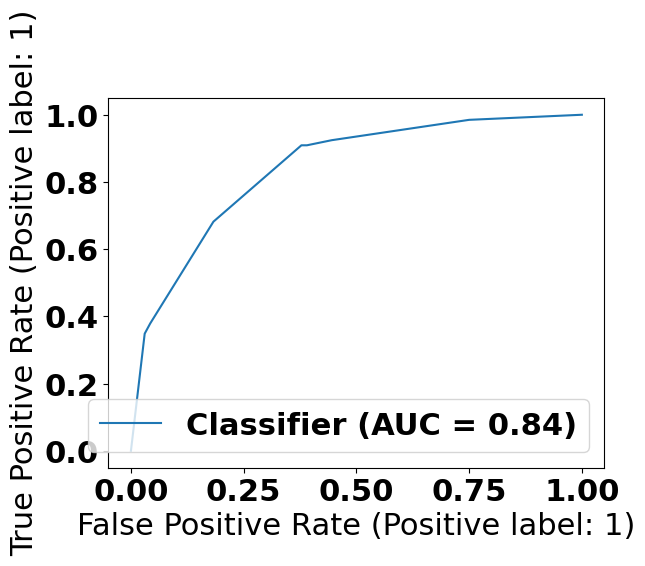

In [19]:
rocDisplay = metrics.RocCurveDisplay.from_predictions(test_y_df,proba_test_y[:,1])